In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [3]:
from manofunkcijos import *

In [67]:
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

In [8]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select round(f.atl,0), s.Profesija from
(select profesija, avg(bdu_spalio) as atl from DUS2014N
group by profesija
order by atl desc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas"""
C.execute(sql)
ans = C.fetchall()
maxatl, maxprof = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     5546.0     |Teisės aktų leid|
| 1 |     4767.0     |Pardavimo, rinko|
| 2 |     5760.0     |Informacinių tec|
| 3 |     4679.0     |Profesionaliųjų |
| 4 |     4933.0     |Laivų ir orlaivi|


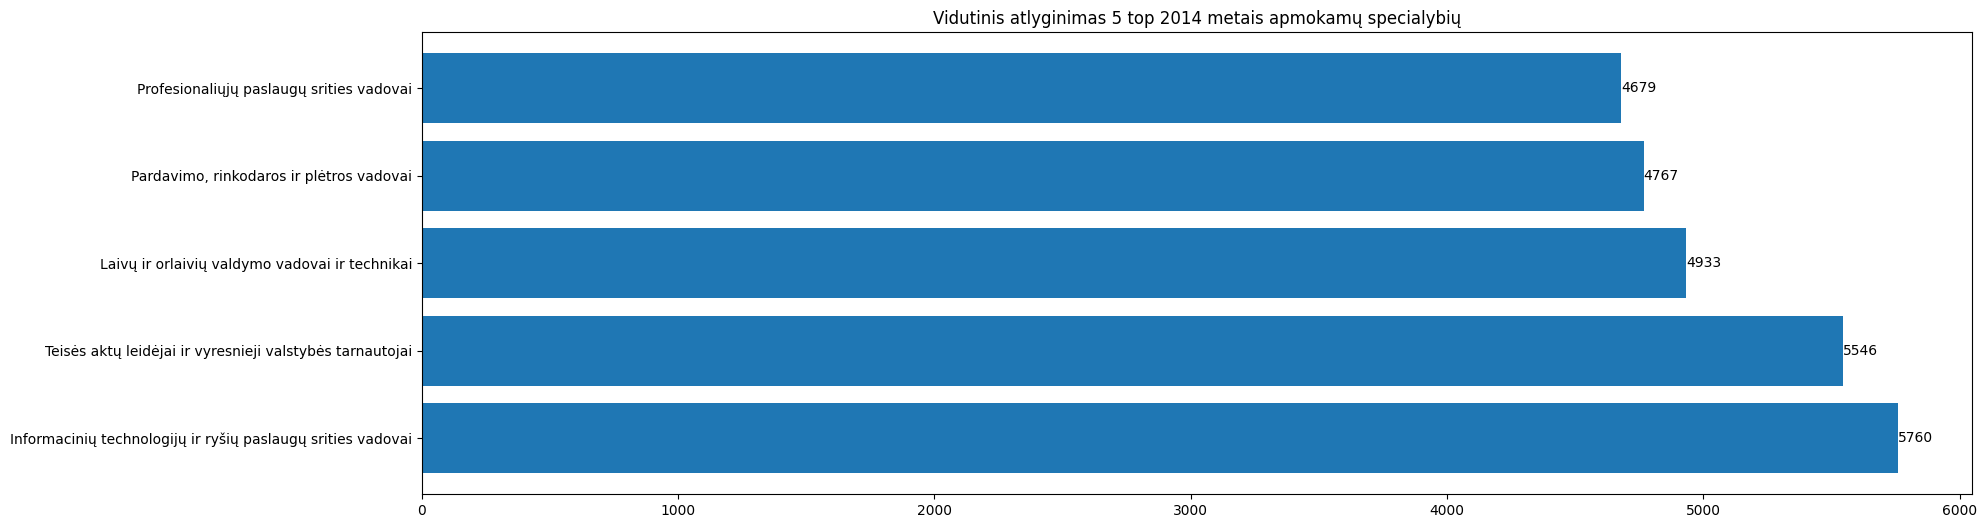

In [58]:
# Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite jų vidutinį atlyginimą stulpeline diagrama (bar arba barh).
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select round(f.atl,0) as a, s.Profesija from
(select profesija, avg(bdu_spalio) as atl from DUS2014N
group by profesija
order by atl desc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
order by a desc"""
C.execute(sql)
ans = C.fetchall()
maxatl, maxprof = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize = [20,6])

a = axis.barh(maxprof, maxatl)
axis.bar_label(a)
axis.set_title('Vidutinis atlyginimas 5 top 2014 metais apmokamų specialybių')
plt.show()


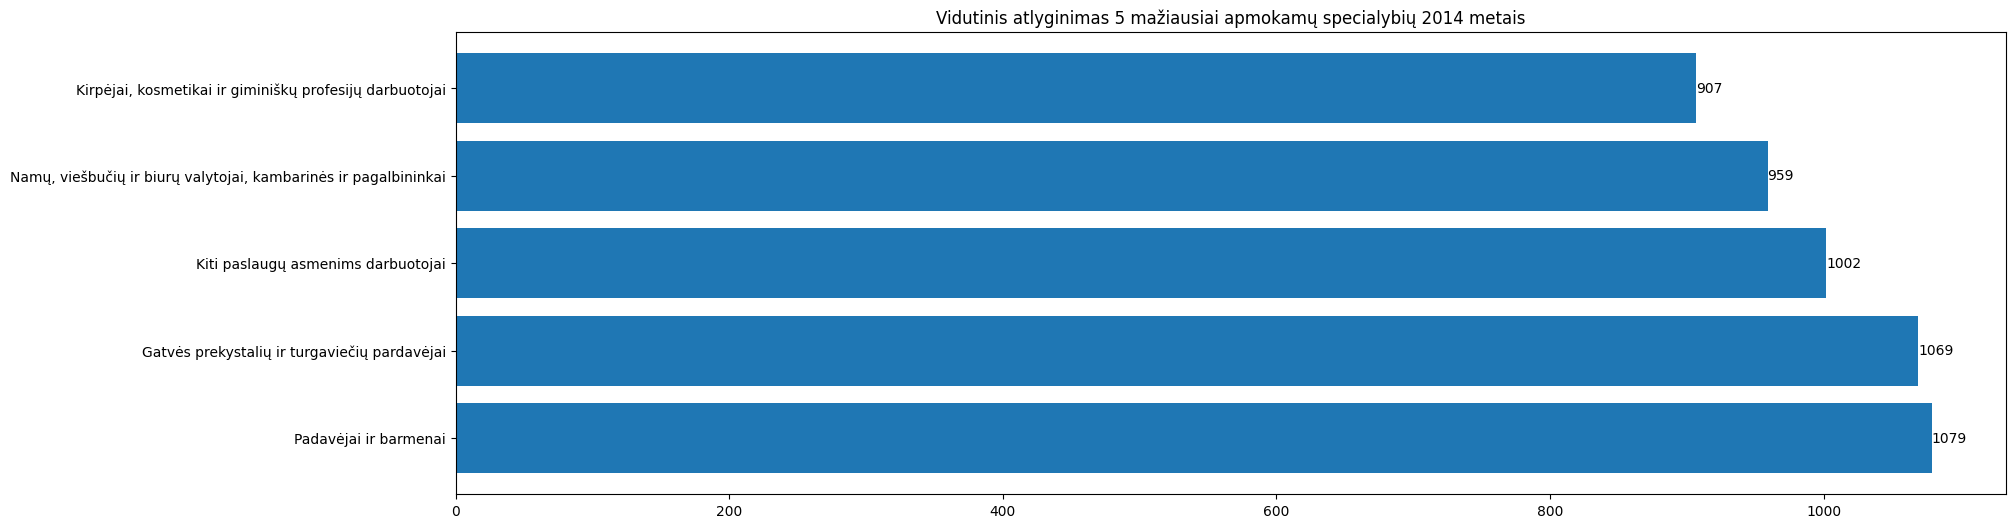

In [57]:
# Raskite 5 mažiausiai apmokamas specialybes 2014 metais, atvaizduokite jų vidutinį atlyginimą su bar arba barh.
sql="""select round(f.atl,0) as a, s.Profesija from
(select profesija, avg(bdu_spalio) as atl from DUS2014N
group by profesija
order by atl asc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
order by a desc"""
C.execute(sql)
ans = C.fetchall()
minatl, minprof = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize = [20,6])

a = axis.barh(minprof, minatl)
axis.bar_label(a)
axis.set_title('Vidutinis atlyginimas 5 mažiausiai apmokamų specialybių 2014 metais')
plt.show()

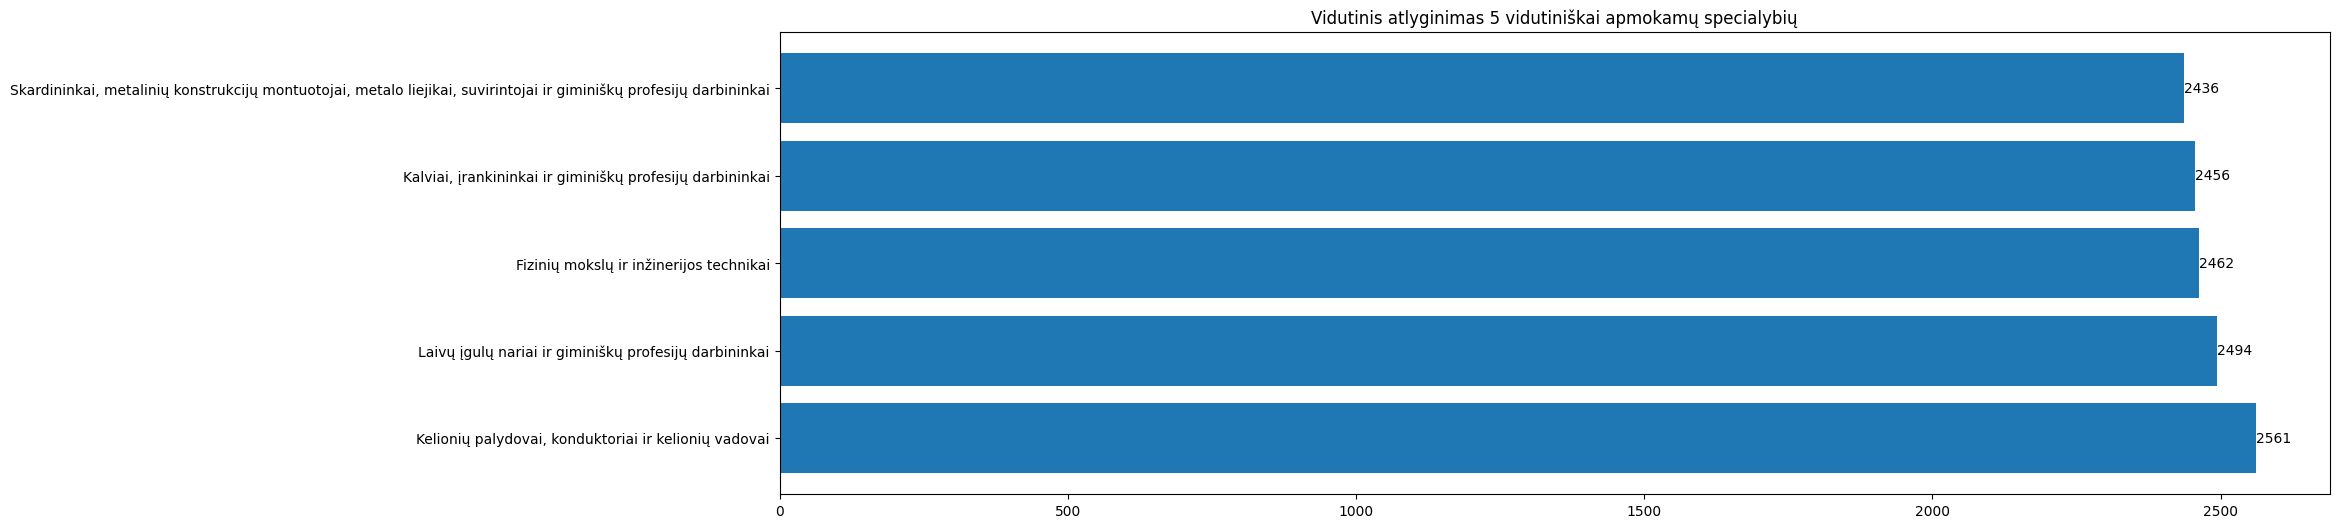

In [56]:
# Raskite 5 vidutiniškai apmokamas specialybes (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias), atvaizduojate vidutinius atlyginimas su bar arba barh.
sql="""select round(f.atl,0) as a, s.Profesija from
(select * from
(select profesija, avg(bdu_spalio) as atl,
case
when avg(bdu_spalio)>(select avg(bdu_spalio)*0.9 from DUS2014N) and avg(bdu_spalio)<=(select avg(bdu_spalio)*1.1 from DUS2014N) then 'Vid_apmok'
else 'ne'
end as vdu
from DUS2014N
group by profesija) as t
where vdu = 'Vid_apmok'
order by atl desc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
order by a desc"""
C.execute(sql)
ans = C.fetchall()
vidatl, vidprof = list(map(list, zip(*ans)))
#? = np.transpose(ans)

fig, axis = plt.subplots(figsize = [20,6])

a = axis.barh(vidprof, vidatl)
axis.bar_label(a)
axis.set_title('Vidutinis atlyginimas 5 vidutiniškai apmokamų specialybių')

plt.show()

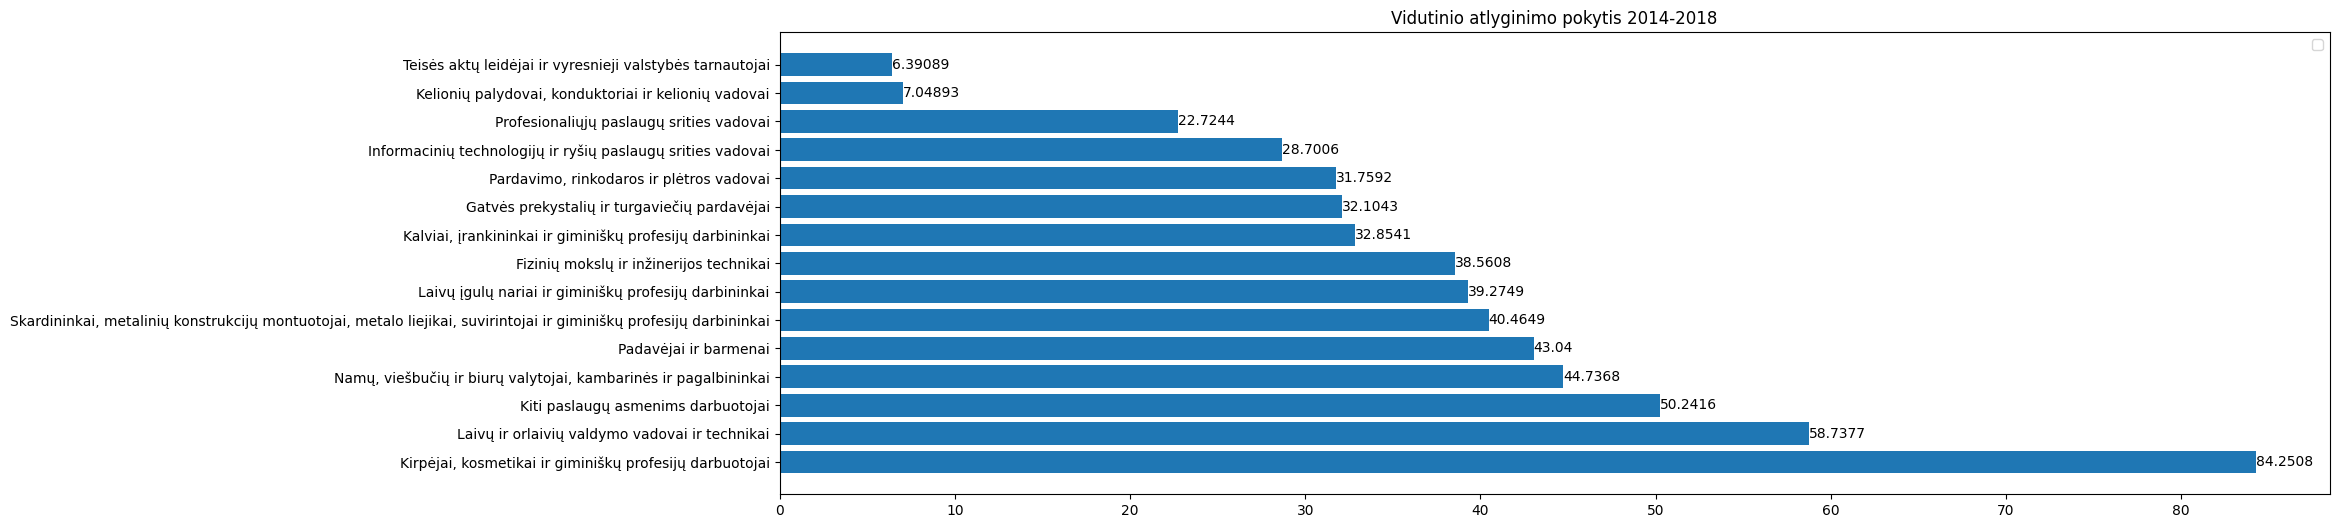

In [86]:
# Tada surandate šių 15-kos specialybių atlyginimų pokytį tarp 2014 ir 2018 metų, pokytį vizualizuokite su bar arba barh. Kokios specialybėsm tas pokytis didžiausias?
sql="""select t.a/3.4528 as d14, t.p, u.a as d18, (u.a-(t.a/3.4528))/(t.a/3.4528)*100 as pok from
(select f.atl as a, s.Profesija as p, s.Kodas as c from
(select profesija, avg(bdu_spalio) as atl from DUS2014N
group by profesija
order by atl desc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
union all
select round(f.atl,0) as a, s.Profesija, s.Kodas from
(select profesija, avg(bdu_spalio) as atl from DUS2014N
group by profesija
order by atl asc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
union all
select round(f.atl,0) as a, s.Profesija, s.Kodas from
(select * from
(select profesija, avg(bdu_spalio) as atl,
case
when avg(bdu_spalio)>(select avg(bdu_spalio)*0.9 from DUS2014N) and avg(bdu_spalio)<=(select avg(bdu_spalio)*1.1 from DUS2014N) then 'Vid_apmok'
else 'ne'
end as vdu
from DUS2014N
group by profesija) as t
where vdu = 'Vid_apmok'
order by atl desc
limit 5) as f
join
(select * from profesijos) as s
on f.profesija = s.Kodas
order by a desc) as t
left join
(select profesija as c, round(avg(bdu_spalio),0) as a from DUS2018N
group by profesija) as u
using (c)
order by pok desc"""
C.execute(sql)
ans = C.fetchall()
d14, prof, d18, pokytis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])
plt.legend(loc='best')
a = axis.barh(prof, pokytis)
axis.bar_label(a)
axis.set_title('Vidutinio atlyginimo pokytis 2014-2018')
plt.show()

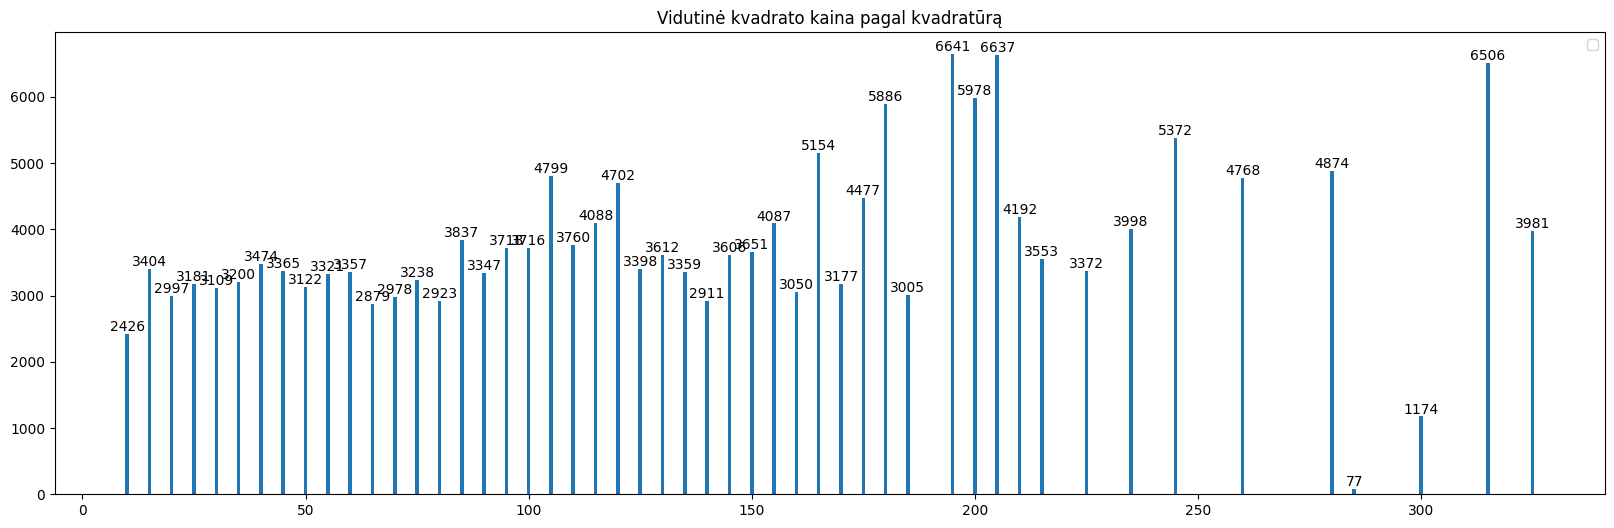

In [87]:
# # 
# -- Pateikite lentelę, kurioje būtų vidutinė kaina jūsų pasirinktam ploto intervalui
# -- pavyzdžiui, suskirstote butų plotus 5 kv m intervalais, ir suraskite vidutinę kainą tam intervalui.
# -- Ar kaina yra linkusi didėti, didėjant plotui?

sql="""select round(avg(vid),0) as prc, grup from
(select *, substring(`€/S`,1,4) as vid, ceil(Plotas/5)*5 as grup
from aruodas) as f
group by grup"""
C.execute(sql)
ans = C.fetchall()
prc, grup = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])
plt.legend(loc='best')
a = axis.bar(grup, prc)
axis.bar_label(a)
axis.set_title('Vidutinė kvadrato kaina pagal kvadratūrą')
plt.show()

IndexError: list index out of range

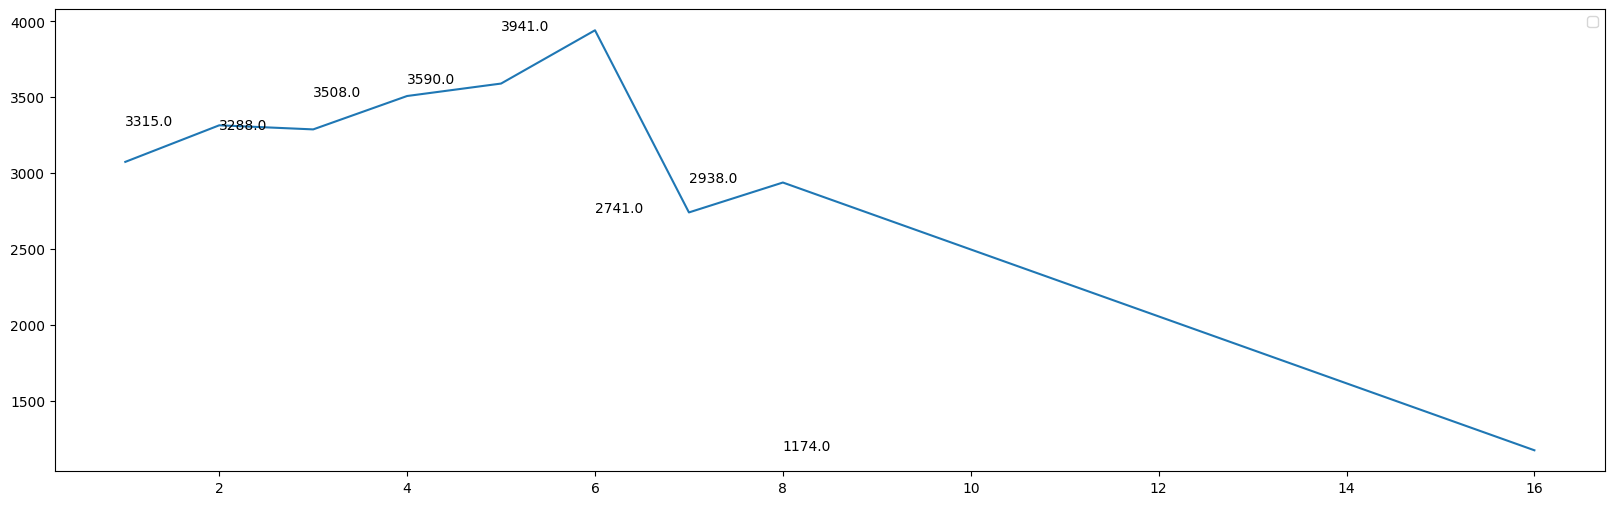

In [95]:
# -- Ar vidutinė kaina priklauso nuo kambarių skaičiaus?
sql="""select round(avg(vid),0) as prc, grup from
(select *, substring(`€/S`,1,4) as vid, kambariai as grup
from aruodas) as f
group by grup"""
C.execute(sql)
ans = C.fetchall()
prc, grup = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])
plt.legend(loc='best')
axis.plot(grup, prc)
for i in grup:
    axis.text(i,prc[i], prc[i])
    

axis.set_title('Vidutinė kvadrato kaina pagal kambarių skaičių')
plt.show()

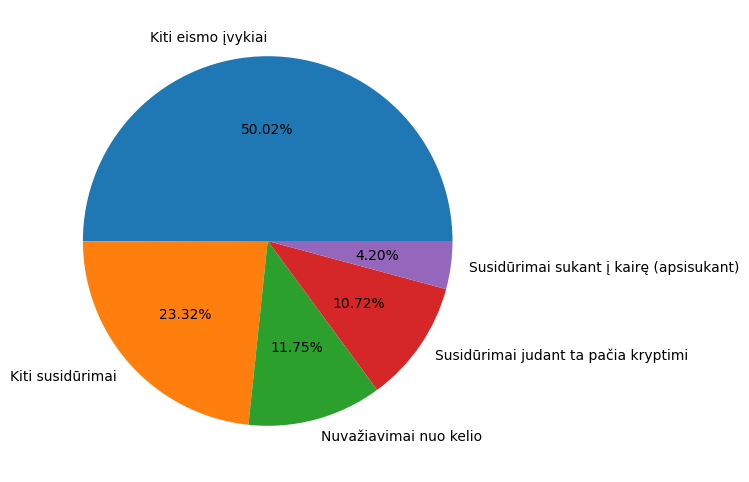

In [101]:
# -- kokie eismo įvykiai sudarė top5? Pateikite procentinę vizualizaciją (pie chart). Lentelė EismIvyk2020, stulpelis schema1. 
sql="""select count(*) as proc, schema1 from EismIvyk2020
group by schema1
order by proc desc limit 5"""
C.execute(sql)
ans = C.fetchall()
prc, grup = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])

axis.pie(prc, labels=grup, autopct = '%.2f%%')

plt.show()
# -- pateikite šių eismo įvykių pokytį tarp 2020 ir 2021 metų, procentais, barh grafiku.

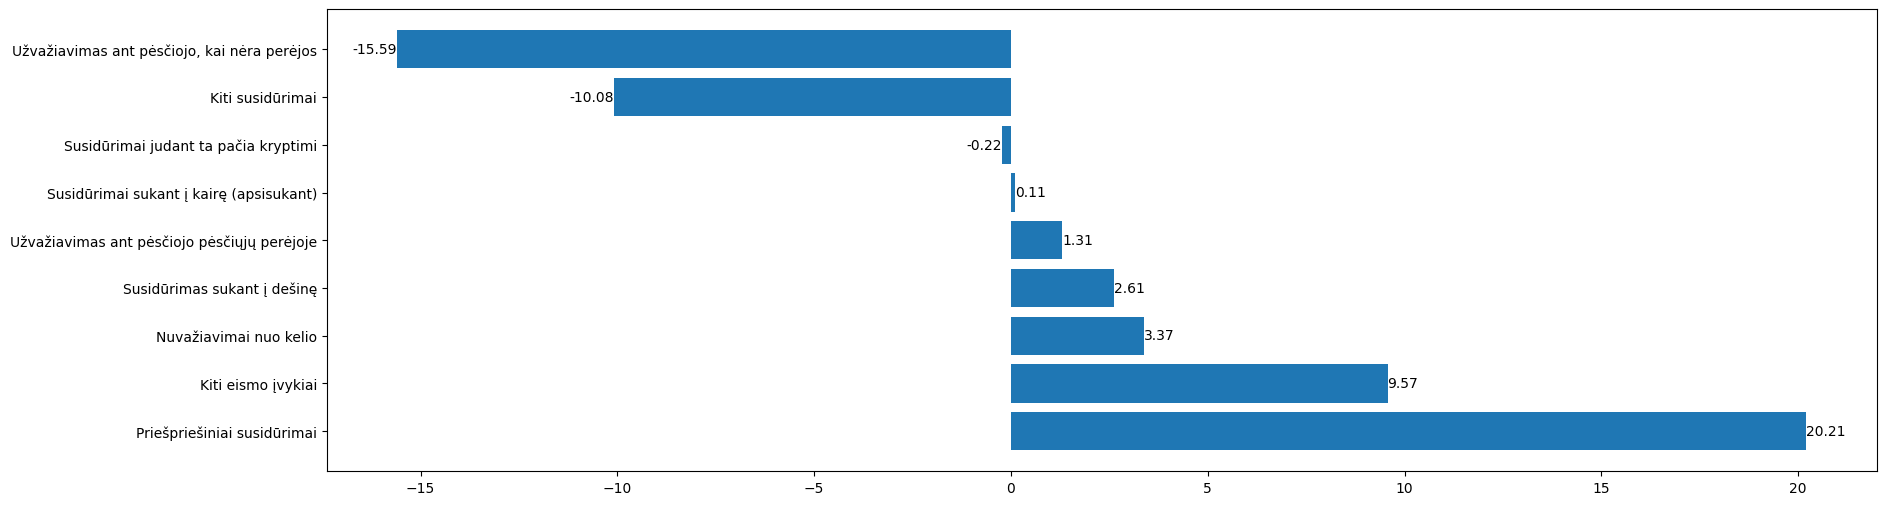

In [109]:
# -- pateikite šių eismo įvykių pokytį tarp 2020 ir 2021 metų, procentais, barh grafiku.

sql="""select schema1, round((s.proc-f.proc)/f.proc*100,2) as skir from 
(select count(*) as proc, schema1 from EismIvyk2020
group by schema1
order by proc desc) as f
left join
(select count(*) as proc, schema1 from EismIvyk2021
group by schema1) as s
using(schema1)
order by skir desc"""
C.execute(sql)
ans = C.fetchall()
grup, prc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])

a=axis.barh(grup, prc)
axis.bar_label(a)
plt.show()